<a href="https://colab.research.google.com/github/jaynarayan94/All-ML-Code-And-Mini-Projects/blob/master/Project_5_Rubric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Content :
### 1. Descriptive Analysis & EDA
### 2. Model to predict whether or not an employee will use Car as a mode of transport :
* Logistic Regression
* KNN
* Naive Bayes 
* Voting
* Bagging
  * Random Forest
  * Bagging Classifier with all 3 Models (Logistic,KNN,Naive Bayes)
* Boosting
    * Gradient Boosting
    * XGBoosting

### 3.Model for 3 Class Classifcation
* Logistic Regression
* KNN
* Naive Bayes 
* Voting
* Bagging
* XGBoost

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



from IPython.display import display

# Import figure from bokeh.plotting
from bokeh.plotting import figure
from bokeh.io import output_notebook,show
output_notebook()

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1234)

In [103]:
from google.colab import files

uploaded = files.upload()

Saving Cars.csv to Cars (4).csv


In [0]:
import io

data = pd.read_csv(io.StringIO(uploaded['Cars.csv'].decode('utf-8')))

In [105]:
data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,1,0.0,5,14.4,5.1,0,2Wheeler
1,24,Male,1,0.0,6,10.6,6.1,0,2Wheeler
2,27,Female,1,0.0,9,15.5,6.1,0,2Wheeler
3,25,Male,0,0.0,1,7.6,6.3,0,2Wheeler
4,25,Female,0,0.0,3,9.6,6.7,0,2Wheeler


In [106]:
# Let's suffle the data for using it as 3 class classifier for later use.
df_3Class = data.sample(frac=1).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age          418 non-null int64
Gender       418 non-null object
Engineer     418 non-null int64
MBA          417 non-null float64
Work Exp     418 non-null int64
Salary       418 non-null float64
Distance     418 non-null float64
license      418 non-null int64
Transport    418 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 29.5+ KB


In [107]:
data = data.dropna()

data['Transport'] = data['Transport'].astype('category')
data['license'] = data['license'].astype('category')
data['MBA'] = data['MBA'].astype('category')
data['Engineer'] = data['Engineer'].astype('category')
data['Gender'] = data['Gender'].astype('category')

Counter(data.Transport)

Counter({'2Wheeler': 83, 'Car': 35, 'Public Transport': 299})

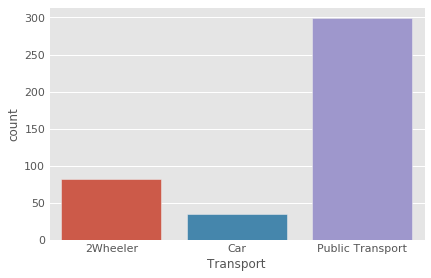

In [108]:
plt.style.use('ggplot')
sns.countplot(data['Transport']);

So, there are three classes, 2Wheeler',  'Car',  'Public Transport', for Mode of Transportation. From the bar chart, it is clear that class distribution is skewed and it is a ‘multi-class classification’ problem with target variable ‘Transport’.

We need to predict whether or not an employee will use Car as a mode of transport.

So we will have to combine 2Wheeler to Public Transport and will give the final name as Other Transport.




In [109]:
# Let us group 2Wheeler & Public Transport together and call them Other_Modes

data['Transport'] = np.where(data['Transport']=='2Wheeler','Other_modes',data['Transport'])

data['Transport'] = np.where(data['Transport']=='Public Transport','Other_modes',data['Transport'])

print(Counter(data['Transport']))

Counter({'Other_modes': 382, 'Car': 35})


In [110]:
label = LabelEncoder()

data['Transport'] = label.fit_transform(data['Transport'])
data['Gender'] = label.fit_transform(data['Gender'])

data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,1,0.0,5,14.4,5.1,0,1
1,24,1,1,0.0,6,10.6,6.1,0,1
2,27,0,1,0.0,9,15.5,6.1,0,1
3,25,1,0,0.0,1,7.6,6.3,0,1
4,25,0,0,0.0,3,9.6,6.7,0,1


In [111]:
data[data.isnull().any(axis=1)]

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


In [112]:
data.describe()

,Age,Gender,Work Exp,Salary,Distance,Transport
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,27.333333,0.712230,5.872902,15.422542,11.296403,0.916067
std,4.158132,0.453267,4.821891,9.671470,3.700982,0.277620
min,18.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,0.000000,3.000000,9.600000,8.600000,1.000000
50%,27.000000,1.000000,5.000000,13.000000,10.900000,1.000000
75%,29.000000,1.000000,8.000000,14.900000,13.600000,1.000000
max,43.000000,1.000000,24.000000,57.000000,23.400000,1.000000


## Exploratory Data Analysis

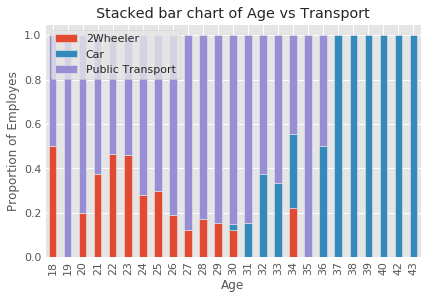

In [113]:
table = pd.crosstab(df_3Class.Age,df_3Class.Transport)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True)
plt.style.use('ggplot')
plt.title('Stacked bar chart of Age vs Transport')
plt.xlabel('Age')
plt.ylabel('Proportion of Employes');
plt.legend(loc='upper left')

plt.show()

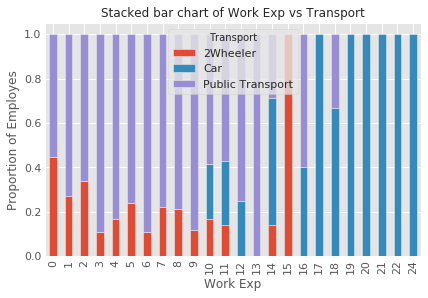

In [114]:
table = pd.crosstab(df_3Class['Work Exp'],df_3Class.Transport)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True)
sns.set()
plt.title('Stacked bar chart of Work Exp vs Transport')
plt.xlabel('Work Exp')
plt.ylabel('Proportion of Employes');

plt.show()

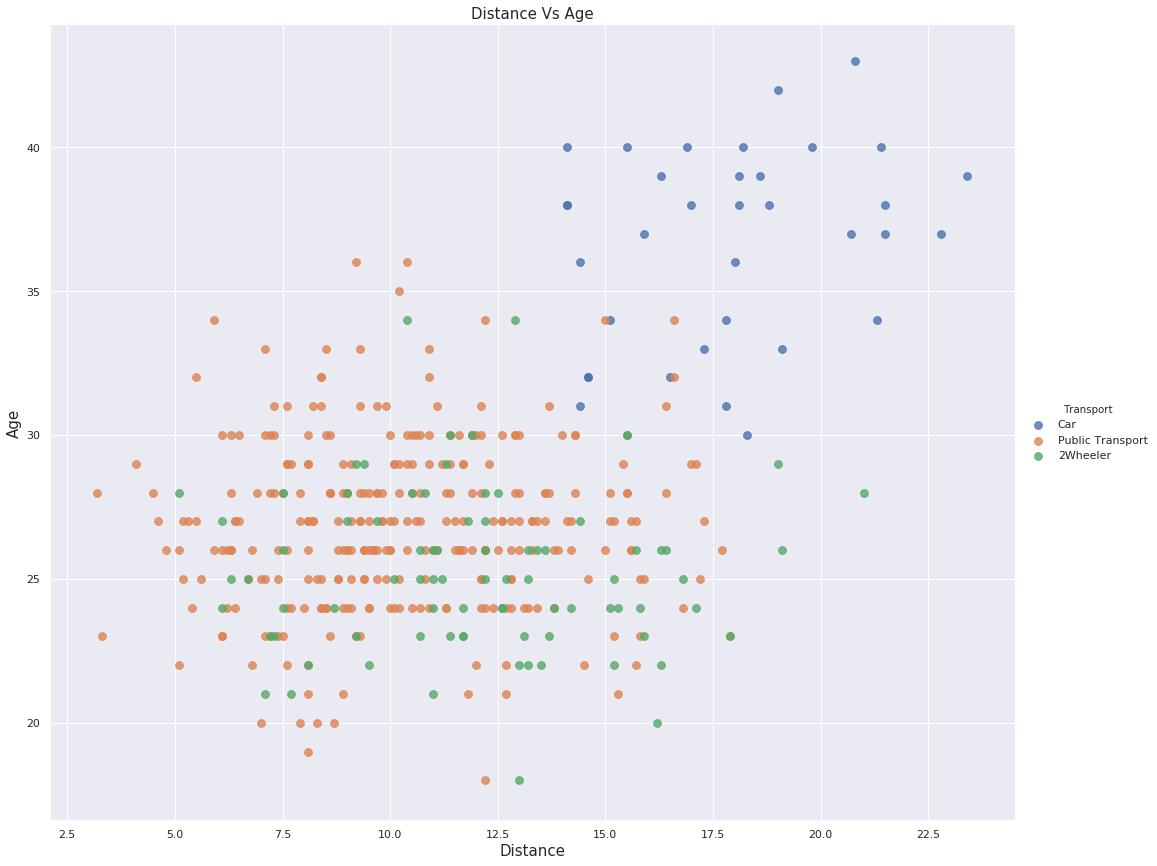

In [116]:
# Seaborn to plot a scatterplot
sns.lmplot('Distance','Age',
          hue = 'Transport',data=df_3Class,
          scatter_kws = {'alpha':0.8,'s':60},fit_reg=False,
          size=12,aspect=1.2);
#Plot labeling
plt.xlabel("Distance", size = 15)
plt.ylabel('Age', size = 15)
plt.title('Distance Vs Age', size = 15)
plt.show();

In [117]:
# Import the ColumnDataSource class from bokeh.plotting
from bokeh.plotting import ColumnDataSource

# import the HoverTool
from bokeh.models import HoverTool

#Import CategoricalColorMapper from bokeh.models
from bokeh.models import CategoricalColorMapper

# Import row from bokeh.layouts
from bokeh.layouts import row

source = ColumnDataSource(df_3Class)

p = figure(x_axis_label='Work Exp', y_axis_label='Distance',tools = 'box_select')

# Make a CategoricalColorMapper object: color_mapper
color_mapper = CategoricalColorMapper(factors=['Public Transport', '2Wheeler', 'Car'],
                                      palette=['skyblue', 'green', 'red'])

# Create a HoverTool object: hover
hover = HoverTool(tooltips=[('Gender','@Gender')])

p.add_tools(hover)

p.circle(x='Work Exp',y='Distance', source=source,
         color=dict(field='Transport', transform=color_mapper),legend='Transport',size=8)

show(p)

In [118]:
# Convert df to a ColumnDataSource: source
source = ColumnDataSource(df_3Class)

# Make a CategoricalColorMapper object: color_mapper
color_mapper = CategoricalColorMapper(factors=['Public Transport', '2Wheeler', 'Car'],
                                      palette=['skyblue', 'green', 'red'])

# Add a circle glyph to the figure p1
p1 = figure(x_axis_label='Distance', y_axis_label='Age',tools = 'box_select')


p1.circle('Distance', 'Age', source=source,
            color=dict(field='Transport', transform=color_mapper),legend='Transport',size=8)

# Add a circle glyph to the figure p2
p2 = figure(x_axis_label='Salary', y_axis_label='Age',tools = 'box_select')


p2.circle('Salary', 'Age', source=source,
            color=dict(field='Transport', transform=color_mapper),legend='Transport',size=8)

# Create a HoverTool object: hover
hover = HoverTool(tooltips=[('Gender','@Gender')])

p1.add_tools(hover)
p2.add_tools(hover)

# Put p1 and p2 into a horizontal row: layout
layout = row(p1, p2)

show(layout)

In [119]:
p = figure(x_axis_label='Age', y_axis_label='Salary',tools = 'box_select')

# Make a CategoricalColorMapper object: color_mapper
color_mapper = CategoricalColorMapper(factors=['Male', 'Female'],
                                      palette=['skyblue', 'green'])

# Add a circle glyph to the figure p
p.circle('Age', 'Salary', source=source,
            color=dict(field='Gender', transform=color_mapper),legend='Gender',size=8)

# Create a HoverTool object: hover
hover = HoverTool(tooltips=[('Transport','@Transport')])

p.add_tools(hover)

show(p)

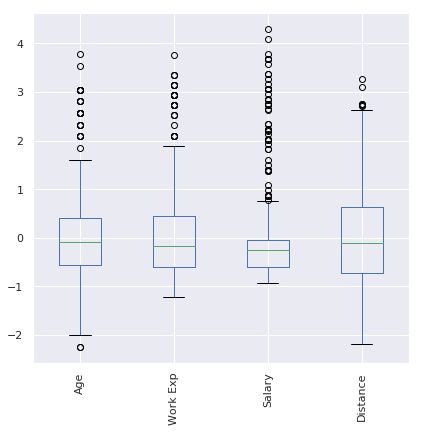

In [120]:
data1 = data.drop(['Gender','Engineer','MBA','license','Transport'],axis=1)
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_array = std_scaler.fit_transform(data1)

scaled_df = pd.DataFrame(scaled_array, columns=data1.columns)
sns.set()
plt.figure(figsize=(6,6))
scaled_df.boxplot()
plt.xticks(rotation='vertical')
plt.show();

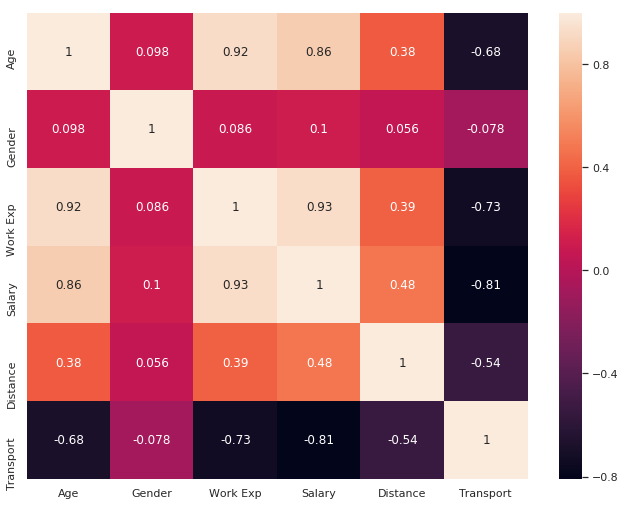

In [121]:
data_cor = data.corr()


plt.figure(figsize=(10,8))
sns.heatmap(data_cor,annot=True);

As per the above correlation plot we can say that the feature Age is highly correlated with Work Exp & Salary and also the Work Exp is highly correlated with Salary.

So we will drop Work Exp & Salary variable as these are highly correlated  with Age.


In [122]:
data = data.drop(['Work Exp','Salary'],axis=1)

data.head(3)

,Age,Gender,Engineer,MBA,Distance,license,Transport
0,28,1,1,0.0,5.1,0,1
1,24,1,1,0.0,6.1,0,1
2,27,0,1,0.0,6.1,0,1


In [123]:
# let's split depedent & Indepent Variables
x = data.drop(['Transport'],axis=1)
y = data['Transport']

os = SMOTE(random_state=1234)
x_train,x_test,y_train,y_test = \
               train_test_split(x,y,test_size=0.2,random_state=1234,stratify=y)

print(x_train.shape,x_test.shape)
print()
print(y_train.shape,y_test.shape)

# For training dataset
x_columns = x_train.columns
print()
print('Train Target :',Counter(y_train))
print()
print('Test Target :', Counter(y_test))

# For training dataset
columns = x_train.columns

os_data_x,os_data_y = os.fit_sample(x_train,y_train)
os_data_x = pd.DataFrame(data = os_data_x,columns=columns)
os_data_y = pd.DataFrame(data = os_data_y,columns=['Transport'])

print('SMOTE Target :', Counter(os_data_y['Transport']))


(333, 6) (84, 6)

(333,) (84,)

Train Target : Counter({1: 305, 0: 28})

Test Target : Counter({1: 77, 0: 7})
SMOTE Target : Counter({0: 305, 1: 305})


In [0]:
result_dict = {}

# Helper function to summarize
def summarize_classification(y_test,y_pred):
    
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    F1_score =  f1_score(y_test,y_pred)
    
    return{'Accuracy:': acc,
           'Accuracy_count:': num_acc,
           'Precision:': prec,
           'Recall:': recall,
           'F1_score:':F1_score}

In [0]:
# Helper function to Build Model
def build_model(classifier_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,test_frac=0.2,
                show_plot_roc=None):
    
    # Separating the  input features (X) and target variable (y)
    x = dataset[name_of_x_cols]
    y= dataset[name_of_y_col]
    
    # feature Scaling
    scale_x = StandardScaler()
    os = SMOTE(random_state=1234)
    x = scale_x.fit_transform(x)
    
    x_train,x_test,y_train,y_test = \
            train_test_split(x,y,test_size=test_frac,random_state=1234,stratify=y)
    
    os_data_x,os_data_y = os.fit_sample(x_train,y_train)
    os_data_x = pd.DataFrame(data = os_data_x,columns=x_columns)
    os_data_y = pd.DataFrame(data = os_data_y,columns=['Transport'])
    
    model = classifier_fn(os_data_x,os_data_y)
    
    y_pred = model.predict(x_test)
    
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)
    
    pred_result = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
    
    model_crosstab = pd.crosstab(pred_result.y_pred,pred_result.y_test)
    
    if show_plot_roc==True:
        logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        plt.figure(figsize=(6,6))
        plt.style.use('fivethirtyeight')
        plt.plot(fpr, tpr, label='Classification (area = %0.2f)' % logit_roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    
    return{'training':train_summary,
          'test':test_summary,
          'confusion_matrix':model_crosstab}

In [0]:
# Helper function to compare the score of different Model.    
def compare_result():
    for key in result_dict:
        print('Classification: ',key)
        
        print()
        print('Training data:-')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
            
        print()
        print('Test Data:-')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
            
        print()

### Model 1 : Logistic Regression

In [0]:
def logistic_fn(x_train,y_train):
    model = LogisticRegression(solver='liblinear',random_state=1234)
    model.fit(x_train,y_train)
    
    return model

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs


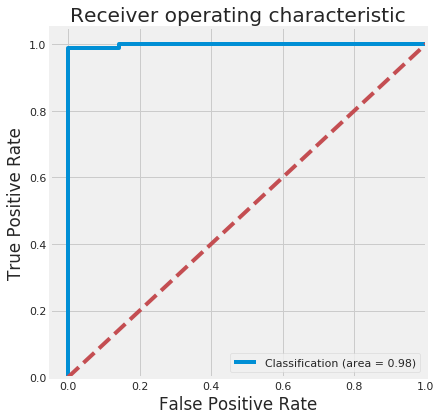

In [128]:
%time

result_dict['Transport ~ Logistic'] = \
    build_model(logistic_fn,'Transport',x_columns,data,show_plot_roc=True)


### Model 2 : K-Nearest Neighbors (KNN)

In [0]:
def knn_fn(x_train,y_train,n_neighbors=3):
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    
    return model

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


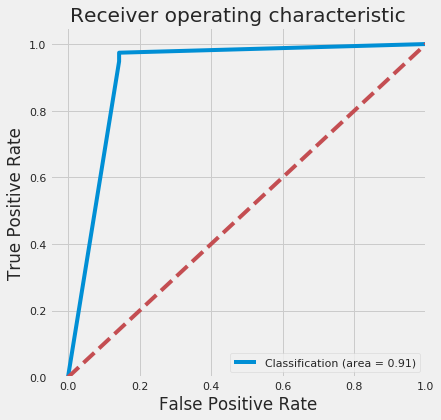

In [130]:
%time

result_dict['Transport ~ KNN'] = \
    build_model(knn_fn,'Transport',x_columns,data,show_plot_roc=True)

### Model 3 : Naive Bayes Classifier

In [0]:
def naive_bayes_fn(x_train,y_train,priors=None):
    
    model = GaussianNB(priors=priors)
    model.fit(x_train,y_train)
    
    return model 

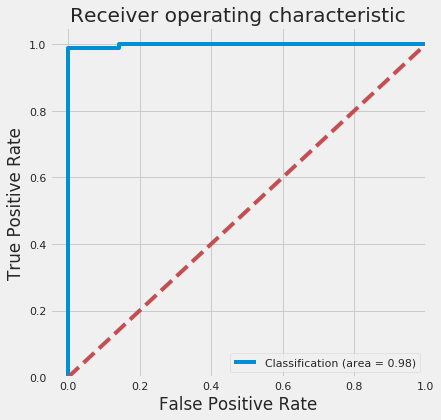

In [132]:
result_dict['Transport ~ Naive_Bayes'] = \
    build_model(naive_bayes_fn,'Transport',x_columns,data,show_plot_roc=True)

In [133]:
compare_result()

Classification:  Transport ~ Logistic

Training data:-
Accuracy: 0.9669669669669669
Accuracy_count: 322
Precision: 1.0
Recall: 0.9639344262295082
F1_score: 0.9816360601001669

Test Data:-
Accuracy: 0.9642857142857143
Accuracy_count: 81
Precision: 1.0
Recall: 0.961038961038961
F1_score: 0.9801324503311257

Classification:  Transport ~ KNN

Training data:-
Accuracy: 0.984984984984985
Accuracy_count: 328
Precision: 1.0
Recall: 0.9836065573770492
F1_score: 0.9917355371900827

Test Data:-
Accuracy: 0.9523809523809523
Accuracy_count: 80
Precision: 0.9866666666666667
Recall: 0.961038961038961
F1_score: 0.9736842105263157

Classification:  Transport ~ Naive_Bayes

Training data:-
Accuracy: 0.972972972972973
Accuracy_count: 324
Precision: 0.9933333333333333
Recall: 0.9770491803278688
F1_score: 0.9851239669421487

Test Data:-
Accuracy: 0.9642857142857143
Accuracy_count: 81
Precision: 1.0
Recall: 0.961038961038961
F1_score: 0.9801324503311257



### Model 4 : Voting Classifiers

This majority-vote classifier is called a hard voting classifier

In [134]:
%time

log_clf = LogisticRegression(solver='liblinear',random_state=1234)
knn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()

voting_clf = VotingClassifier(
    estimators = [('log_reg',log_clf),('knn',knn_clf),('gnb' ,gnb_clf)],voting='hard')

voting_clf.fit(x_train,y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1234,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                       

In [135]:
y_pred_voting = voting_clf.predict(x_test)

print('VotingClassifier Accuracy Score :', voting_clf.score(x_test,y_test))
print()
print(pd.crosstab(y_test,y_pred_voting))
print()
print(classification_report(y_test,y_pred_voting))

VotingClassifier Accuracy Score : 0.9880952380952381

col_0      0   1
Transport       
0          7   0
1          1  76

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.99      0.99        77

    accuracy                           0.99        84
   macro avg       0.94      0.99      0.96        84
weighted avg       0.99      0.99      0.99        84



In [136]:
# Let’s look at each classifier’s accuracy on the test set:

for clf in (log_clf,knn_clf,gnb_clf,voting_clf):
  
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
    
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred)*100)

LogisticRegression 94.04761904761905
KNeighborsClassifier 100.0
GaussianNB 97.61904761904762
VotingClassifier 98.80952380952381


## Bagging Models
### Model 5 : Random Forest Classifiers with default bagging

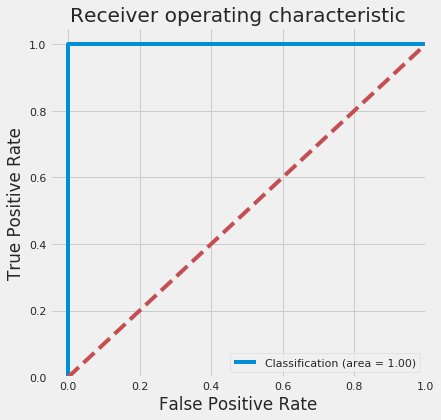

In [137]:
def random_forest(x_train,y_train):
  
  model = RandomForestClassifier(n_estimators=50, max_leaf_nodes=5, n_jobs=-1)
  model.fit(x_train, y_train)
  return model

result_dict['Transport ~ Random Forest'] = \
    build_model(random_forest,'Transport',x_columns,data,show_plot_roc=True)

### Model 5a : Bagging  for Logistic Regression Classifiers

In [138]:
bag_clf = BaggingClassifier(
    LogisticRegression(solver='liblinear'),
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(os_data_x, os_data_y)
y_pred_bagging = bag_clf.predict(x_test)

print('BaggingClassifier for Logistic Regression Accuracy Score :', voting_clf.score(x_test,y_test))
print()
print(pd.crosstab(y_test,y_pred_bagging))
print()
print(classification_report(y_test,y_pred_bagging))

BaggingClassifier for Logistic Regression Accuracy Score : 0.9880952380952381

col_0       0   1
Transport        
0           6   1
1          12  65

              precision    recall  f1-score   support

           0       0.33      0.86      0.48         7
           1       0.98      0.84      0.91        77

    accuracy                           0.85        84
   macro avg       0.66      0.85      0.69        84
weighted avg       0.93      0.85      0.87        84



### Model 5b : Bagging  for KNN Classifiers

* According to this oob evaluation, this BaggingClassifier is likely to achieve about 96.99% accuracy on the test set. 
* Let’s verify this:
* We get 98.88% accuracy on the test set—close enough!

In [139]:
bag_clf = BaggingClassifier(
    KNeighborsClassifier(),max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
y_pred_bagging = bag_clf.predict(x_test)

print('BaggingClassifier for KNN Accuracy Score :', voting_clf.score(x_test,y_test),'\n')
print('Out of Bag Score :',bag_clf.oob_score_,'\n')
print(pd.crosstab(y_test,y_pred_bagging))
print()
print(classification_report(y_test,y_pred_bagging))

BaggingClassifier for KNN Accuracy Score : 0.9880952380952381 

Out of Bag Score : 0.975975975975976 

col_0      0   1
Transport       
0          6   1
1          0  77

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.99      1.00      0.99        77

    accuracy                           0.99        84
   macro avg       0.99      0.93      0.96        84
weighted avg       0.99      0.99      0.99        84



### Model 5c : Bagging  for Naive Bayes Classifiers


* According to this oob evaluation, this BaggingClassifier is likely to achieve about 96.39% accuracy on the test set. 
* Let’s verify this:
* We get 98.88% accuracy on the test set—close enough!

In [140]:

bag_clf = BaggingClassifier(
    GaussianNB(),max_samples=100, bootstrap=True, n_jobs=-1,oob_score=True)

bag_clf.fit(x_train, y_train)
y_pred_bagging = bag_clf.predict(x_test)

print('BaggingClassifier for Naive Bayes Accuracy Score :', voting_clf.score(x_test,y_test),'\n')
print('Out of Bag Score :',bag_clf.oob_score_,'\n')
print(pd.crosstab(y_test,y_pred_bagging))
print()
print(classification_report(y_test,y_pred_bagging))


BaggingClassifier for Naive Bayes Accuracy Score : 0.9880952380952381 

Out of Bag Score : 0.954954954954955 

col_0      0   1
Transport       
0          6   1
1          4  73

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.99      0.95      0.97        77

    accuracy                           0.94        84
   macro avg       0.79      0.90      0.84        84
weighted avg       0.95      0.94      0.95        84



## Boosting Classifier
### Model 6 : Gradient Boosting Classifier

In [142]:
%time

GB_clf = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)

GB_clf.fit(x_train, y_train)

y_pred_GB_clf = GB_clf.predict(x_test)

print('GradientBoostingClassifier Accuracy Score :', GB_clf.score(x_test,y_test),'\n')

print(pd.crosstab(y_test,y_pred_GB_clf))
print()
print(classification_report(y_test,y_pred_GB_clf))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs
GradientBoostingClassifier Accuracy Score : 1.0 

col_0      0   1
Transport       
0          7   0
1          0  77

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        77

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Model 6a : Extreme Gradient Boosting Classifier (XGBoost)

In [143]:
%time

import xgboost as xgb

xgb_clf = Pipeline(steps=[('xgboost',xgb.XGBClassifier(objective='binary:logistic'))])

scores = cross_val_score(xgb_clf,os_data_x,os_data_y,cv=10)

print('Accuracy for XGBoost Classifier with Cross Validation on SMOTE data: ',scores.mean(),'\n')

xgb_clf.fit(x_train.astype('float'),y_train.astype('float'))

y_pred_xgb_clf = xgb_clf.predict(x_test.astype('float'))

print('XGBoosting Accuracy Score on Un-balanced dataset :', accuracy_score(y_test,y_pred_xgb_clf),'\n')

print(pd.crosstab(y_test,y_pred_xgb_clf))
print()
print(classification_report(y_test,y_pred_xgb_clf))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs
Accuracy for XGBoost Classifier with Cross Validation on SMOTE data:  0.9918279569892471 

XGBoosting Accuracy Score on Un-balanced dataset : 1.0 

col_0      0.0  1.0
Transport          
0            7    0
1            0   77

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        77

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## Let's build theModel for 3 Class Classifcation problem
* Logistic Regression
* KNN
* Naive Bayes 
* XGBoost

In [144]:
np.random.seed(1234)
df_3Class = df_3Class.dropna()

df_3Class['Transport'] = df_3Class['Transport'].astype('category')
df_3Class['license'] = df_3Class['license'].astype('category')
df_3Class['MBA'] = df_3Class['MBA'].astype('category')
df_3Class['Engineer'] = df_3Class['Engineer'].astype('category')
df_3Class['Gender'] = df_3Class['Gender'].astype('category')

label = LabelEncoder()

df_3Class['Transport'] = label.fit_transform(df_3Class['Transport'])
df_3Class['Gender'] = label.fit_transform(df_3Class['Gender'])

df_3Class = df_3Class.drop(['Work Exp','Salary'],axis=1)

print(Counter(df_3Class.Transport))

Counter({2: 299, 0: 83, 1: 35})


In [145]:
# let's split depedent & Indepent Variables for 3 Class Classification Problem
x = df_3Class.drop(['Transport'],axis=1)
y = df_3Class['Transport']

os = SMOTE(random_state=1234)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

# For training dataset
columns = x_train.columns

os_data_x,os_data_y = os.fit_sample(x_train,y_train)
os_data_x = pd.DataFrame(data = os_data_x,columns=columns)
os_data_y = pd.DataFrame(data = os_data_y,columns=['Transport'])

print(os_data_x.shape,os_data_y.shape)

print(Counter(os_data_y['Transport']))

(333, 6) (84, 6)
(333,) (84,)
(717, 6) (717, 1)
Counter({2: 239, 0: 239, 1: 239})


### Model 1 : Multinomial Logistic Regression

In [146]:
%%time

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg',LogisticRegression(multi_class='multinomial',solver='sag',max_iter=20))])

scores = cross_val_score(pl_log_reg,os_data_x,os_data_y,cv=10,scoring='accuracy')
print('Accuracy for Logisitic Regression : ',scores.mean())

Accuracy for Logisitic Regression :  0.8132246376811594
CPU times: user 107 ms, sys: 1.36 ms, total: 109 ms
Wall time: 113 ms


In [147]:
log_model = LogisticRegression(multi_class='multinomial',solver='sag',max_iter=20,random_state=1234,)
log_model.fit(x_train,y_train)

y_pred_log = log_model.predict(x_test)

act_pred = pd.DataFrame({'Acual':y_test,'Predicted':y_pred_log})

act_pred.sample(10)

,Acual,Predicted
192,0,2
231,2,2
5,2,2
161,2,2
35,2,2
31,2,2
287,0,2
386,2,2
375,1,2
238,2,2


In [148]:
print('Logistic Regression Accuracy Score :', log_model.score(x_test,y_test))
print()
print(pd.crosstab(y_test,y_pred_log))
print()
print(classification_report(y_test,y_pred_log))

Logistic Regression Accuracy Score : 0.6904761904761905

col_0      0  1   2
Transport          
0          0  2  15
1          0  0   7
2          2  0  58

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00         7
           2       0.72      0.97      0.83        60

    accuracy                           0.69        84
   macro avg       0.24      0.32      0.28        84
weighted avg       0.52      0.69      0.59        84



### Model 2 : Multi Class K-Nearest Neighbors (KNN)

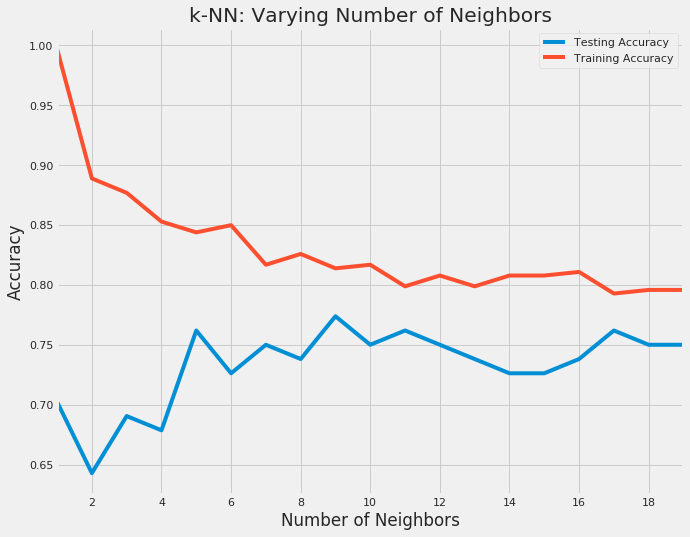

In [149]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.figure(figsize=(10,8))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xlim(1,19)
plt.show()


In [150]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

# print(confusion_matrix(y_test,y_pred_knn))
print(pd.crosstab(y_test,y_pred_knn))
print('KNN Accuracy Score :', knn.score(x_test,y_test))
print()
print(classification_report(y_test,y_pred_knn))

col_0      0  1   2
Transport          
0          1  0  16
1          0  5   2
2          3  0  57
KNN Accuracy Score : 0.75

              precision    recall  f1-score   support

           0       0.25      0.06      0.10        17
           1       1.00      0.71      0.83         7
           2       0.76      0.95      0.84        60

    accuracy                           0.75        84
   macro avg       0.67      0.57      0.59        84
weighted avg       0.68      0.75      0.69        84



In [151]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Creating the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(x_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(x_train, y_train)

y_pred_knn_pl = pipeline.predict(x_test)

# Compute and print metrics
print(pd.crosstab(y_test,y_pred_knn_pl))
print('Accuracy with Scaling: {}'.format(knn_scaled.score(x_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(x_test,y_test)))
print()
print('Confusion Matrix of the scaled KNN:')
print(classification_report(y_test,y_pred_knn_pl))


col_0      0  1   2
Transport          
0          4  0  13
1          1  4   2
2          3  0  57
Accuracy with Scaling: 0.7738095238095238
Accuracy without Scaling: 0.7619047619047619

Confusion Matrix of the scaled KNN:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        17
           1       1.00      0.57      0.73         7
           2       0.79      0.95      0.86        60

    accuracy                           0.77        84
   macro avg       0.76      0.59      0.64        84
weighted avg       0.75      0.77      0.74        84



### Model 3 : Multinomial Naive Bayes Classifier

In [152]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB(fit_prior=None)
NB_model.fit(x_train,y_train)


y_pred_NB = NB_model.predict(x_test)

# Compute and print metrics
print('Accuracy without Scaling: {}'.format(NB_model.score(x_test,y_test)))
print()
print('Confusion Matrix of the scaled KNN:')
print(classification_report(y_test,y_pred_NB))

Accuracy without Scaling: 0.6785714285714286

Confusion Matrix of the scaled KNN:
              precision    recall  f1-score   support

           0       0.25      0.24      0.24        17
           1       0.36      0.57      0.44         7
           2       0.86      0.82      0.84        60

    accuracy                           0.68        84
   macro avg       0.49      0.54      0.51        84
weighted avg       0.69      0.68      0.68        84



### Model 4 : Multi Class XGBoost Classifier

In [153]:
%time

import xgboost as xgb

pl_xgb = Pipeline(steps=[('xgboost',xgb.XGBClassifier(objective='multi::softmax'))])

scores = cross_val_score(pl_xgb,os_data_x,os_data_y,cv=10)

print('Accuracy for XGBoost Classifier : ',scores.mean())

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs
Accuracy for XGBoost Classifier :  0.9096618357487923


### Model : Mutlinomial  Voting Classifiers

In [154]:
%time

log_clf = LogisticRegression(multi_class='multinomial',solver='sag')
knn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()

voting_clf = VotingClassifier(
    estimators = [('log_reg',log_clf),('knn',knn_clf),('gnb' ,gnb_clf)],voting='hard')

voting_clf.fit(x_train,y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='sag', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                      

In [155]:
y_pred_voting = voting_clf.predict(x_test)

print('VotingClassifier Accuracy Score :', voting_clf.score(x_test,y_test))
print()
print(pd.crosstab(y_test,y_pred_voting))
print()
print(classification_report(y_test,y_pred_voting))

VotingClassifier Accuracy Score : 0.7619047619047619

col_0      0  1   2
Transport          
0          2  1  14
1          0  4   3
2          2  0  58

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        17
           1       0.80      0.57      0.67         7
           2       0.77      0.97      0.86        60

    accuracy                           0.76        84
   macro avg       0.69      0.55      0.57        84
weighted avg       0.72      0.76      0.71        84



### Model : Mutlinomial  Bagging Classifiers

In [156]:
bag_clf = BaggingClassifier(
    KNeighborsClassifier(),max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
y_pred_bagging = bag_clf.predict(x_test)

print('BaggingClassifier for KNN Accuracy Score :', voting_clf.score(x_test,y_test),'\n')
print('Out of Bag Score :',bag_clf.oob_score_,'\n')
print(pd.crosstab(y_test,y_pred_bagging))
print()
print(classification_report(y_test,y_pred_bagging))

BaggingClassifier for KNN Accuracy Score : 0.7619047619047619 

Out of Bag Score : 0.7627627627627628 

col_0      0  1   2
Transport          
0          2  0  15
1          0  4   3
2          2  0  58

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        17
           1       1.00      0.57      0.73         7
           2       0.76      0.97      0.85        60

    accuracy                           0.76        84
   macro avg       0.75      0.55      0.59        84
weighted avg       0.73      0.76      0.71        84

